In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv - Mall_Customers.csv.csv")

In [4]:
# Data Preprocessing
data.drop(columns=["CustomerID"], inplace=True)  # Drop unnecessary column

data.dropna(inplace=True)  # Handle missing values (if any)


In [5]:
# Selecting Features: Annual Income and Spending Score
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]


In [6]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [8]:

# Apply K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

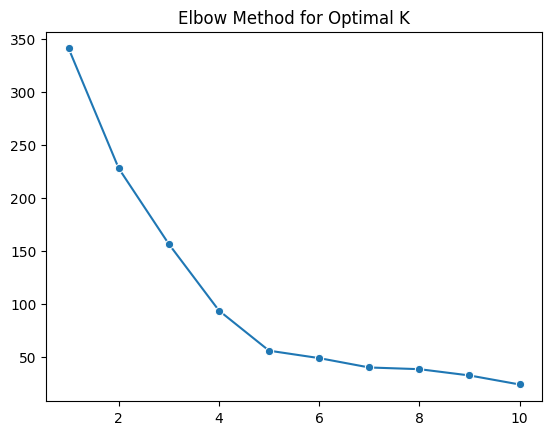

In [9]:
# Plot Elbow Method
g = sns.lineplot(x=range(1, 11), y=wcss, marker='o')
g.set_title("Elbow Method for Optimal K")
plt.show()

In [10]:
# Applying K-Means with Optimal K=5 (based on elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

data['KMeans_Cluster'] = kmeans_labels

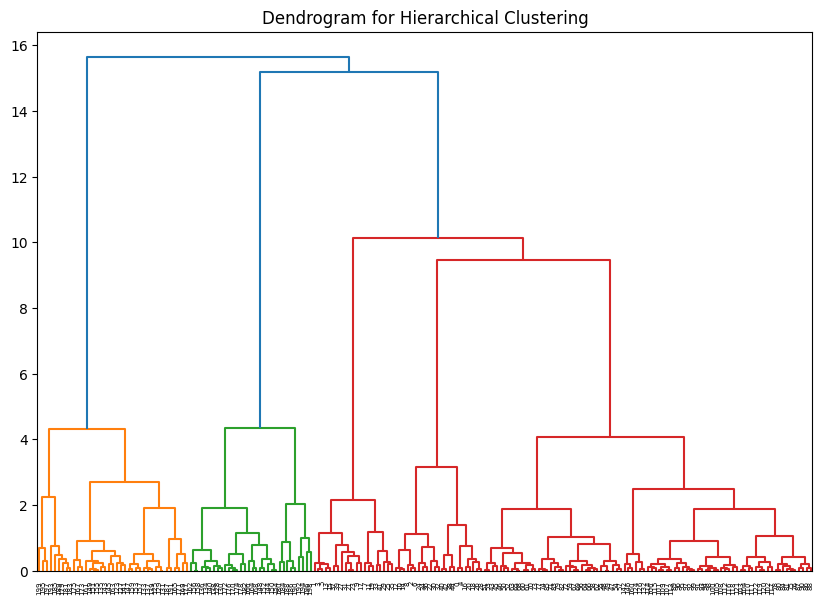

In [11]:
# Apply Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [13]:
# Applying Hierarchical Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

data['Hierarchical_Cluster'] = hc_labels

In [14]:
# Evaluate Clustering (Silhouette Score)
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
hc_score = silhouette_score(X_scaled, hc_labels)
print(f"Silhouette Score for K-Means: {kmeans_score}")
print(f"Silhouette Score for Hierarchical Clustering: {hc_score}")

Silhouette Score for K-Means: 0.5546571631111091
Silhouette Score for Hierarchical Clustering: 0.5538089226688662
